# Creating graphs for Titanic data

First set up  the directory with the data

In [2]:
#%matplotlib notebook
%matplotlib inline

import csv as csv
import numpy as np
import plotly
import  matplotlib.mlab  as mlab
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

my_project_dir = "C:\\Users\Johnny\Documents\GitHub\Titanic\kaggle_data\\"


Load and preview the data

In [3]:
csv_file_object = csv.reader(open(my_project_dir + 'train.csv', 'r'))       # Load in the csv file
header = next(csv_file_object)                     # Skip the fist line as it is a header
data=[]                                            # Create a variable to hold the data

for row in csv_file_object:                        # Skip through each row in the csv file,
    data.append(row[0:])                           # adding each row to the data variable
    

data = np.array(data)                              # importing data as np array
print (header[:])
print (data[0:2,:])


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
[['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
  '7.25' '' 'S']
 ['2' '1' '1' 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
  'female' '38' '1' '0' 'PC 17599' '71.2833' 'C85' 'C']]


In [4]:
def sum_groups (arr_groups,arr_data):
    unique_groups = np.unique(arr_groups)
    arr_sums = []
    for group in unique_groups:
        arr_sums.append(arr_data[arr_groups == group].sum())
    
    return unique_groups,arr_sums

342


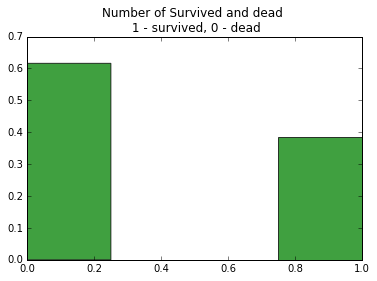

In [6]:
X = data[:,1].astype(np.float)

X_weights = np.ones_like(X)/float(len(X))   
print (sum(X==1))

n, bins, patches = plt.hist(X, 4, weights = X_weights,  facecolor='g', alpha=0.75)
plt.title('Number of Survived and dead \n 1 - survived, 0 - dead')
plt.show()

#print (n,bins, patches[:])



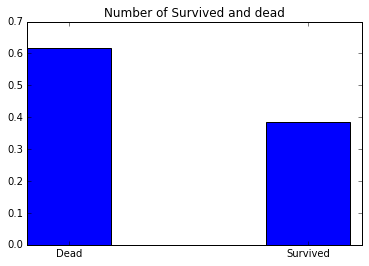

In [15]:
# Selecting data
y_class = data[:,1].astype(np.integer)
X = np.ones_like(y_class)
y_groups, X_data = sum_groups (y_class, X)
X_data = X_data/sum(X_data)
#print ([X_data[0]],X_data[1])

# Plotting the data
width = 0.35
ind = np.arange(len(y_groups))

fig, ax = plt.subplots()
ax.bar(ind,X_data, width)
pl.xticks(ind + width/2,['Dead', 'Survived'])
plt.title('Number of Survived and dead')
pl.show()


#rects1 = plt.bar(index, means_men)

#data2 = [[np.random.rand(100)] for i in range(3)]
#pl.boxplot(data2)
#pl.xticks([1, 2, 3], ['mon', 'tue', 'wed'])
#pl.show()

In [16]:
# Title
import re 

print (header)
p_match = re.compile("\w*\.")
arg_match = list(map(lambda x: p_match.findall(x)[0],data[:,3]))
arg_match = np.array(arg_match)

for title in np.unique(arg_match):
    print (title, " ", sum(arg_match[::]==title))
        


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Capt.   1
Col.   2
Countess.   1
Don.   1
Dr.   7
Jonkheer.   1
Lady.   1
Major.   2
Master.   40
Miss.   182
Mlle.   2
Mme.   1
Mr.   517
Mrs.   125
Ms.   1
Rev.   6
Sir.   1


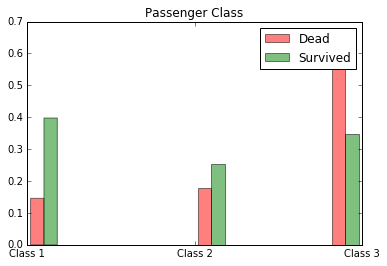

In [17]:
# passenger class
X = data[:,2].astype(np.float)
y_class = data[:,1].astype(np.integer)

X_weights = []
for d_class in np.unique(y_class):
    ones_group = np.ones_like(X[y_class==d_class])
    X_weights.append(ones_group/len(X[y_class==d_class]))

#print (X_weights)
width = 0.15
ind = np.arange(len(np.unique(X)))+1

plt.title('Passenger Class')
plt.hist((X[y_class==0],X[y_class==1]),
         color=("r","g"), 
         weights= X_weights, 
         alpha=0.5, 
         label = ("Dead","Survived"))

plt.xticks(ind,['Class 1', 'Class 2','Class 3'])


#plt.hist(,color="g", alpha=0.5, stacked=True, label = "Survived")
plt.legend(loc='upper right')

In [18]:
# names
X = data[:,3]
y_class = data[:,1].astype(np.integer)

t_d = np.array(list(zip(X, y_class)))
print (t_d[1:10])


[['Cumings, Mrs. John Bradley (Florence Briggs Thayer)' '1']
 ['Heikkinen, Miss. Laina' '1']
 ['Futrelle, Mrs. Jacques Heath (Lily May Peel)' '1']
 ['Allen, Mr. William Henry' '0']
 ['Moran, Mr. James' '0']
 ['McCarthy, Mr. Timothy J' '0']
 ['Palsson, Master. Gosta Leonard' '0']
 ['Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)' '1']
 ['Nasser, Mrs. Nicholas (Adele Achem)' '1']]


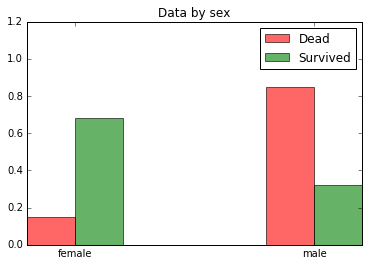

In [19]:
# sex
X = data[:,4]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by sex")
plt.show()

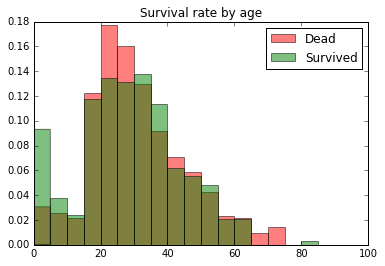

In [20]:
# age
X = data[:,5]
X[X==""] = 0
X_weights = np.ones_like(X).astype(float)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'
y_names[X=='0'] = 'not defined'

for my_class in np.unique(y_names):
   X_weights[y_names == my_class] = 1/sum(y_names == my_class)

#print (X[y_names == 'Survived'])

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in ("Dead","Survived"):
    pl_data = X[y_names==my_class].astype(float)
    pl_weight = X_weights[y_names==my_class].astype(float)
    #print (pl_data)
    #ind = np.arange(len(np.unique(X)))
    plt.hist(pl_data,
             bins = 20,
             range = [0,100],
             weights = pl_weight,
             alpha = 0.5,
             label = my_class,
             color = col_arr[i_ind])
    

    i_ind = i_ind + 1

    
plt.legend(loc='upper right')
plt.title ("Survival rate by age")
plt.show()

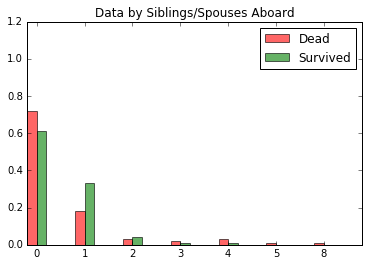

In [21]:
# Number of Siblings
X = data[:,6]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by Siblings/Spouses Aboard")
plt.show()

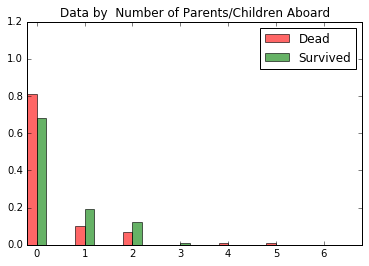

In [22]:
#  Number of Parents/Children Aboard
X = data[:,7]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by  Number of Parents/Children Aboard")
plt.show()


In [23]:
# names
X = data[:,8]
y_class = data[:,1].astype(np.integer)

t_d = np.array(list(zip(X, y_class)))
print (t_d[1:10])

[['PC 17599' '1']
 ['STON/O2. 3101282' '1']
 ['113803' '1']
 ['373450' '0']
 ['330877' '0']
 ['17463' '0']
 ['349909' '0']
 ['347742' '1']
 ['237736' '1']]


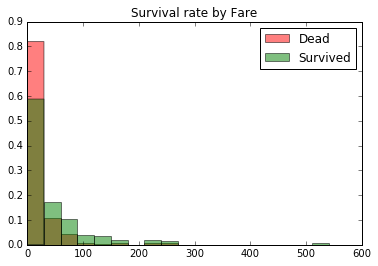

In [24]:
# Fare
X = data[:,9]
X_weights = np.ones_like(X).astype(float)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

for my_class in np.unique(y_names):
   X_weights[y_names == my_class] = 1/sum(y_names == my_class)

#print (X[y_names == 'Survived'])

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in ("Dead","Survived"):
    pl_data = X[y_names==my_class].astype(float)
    pl_weight = X_weights[y_names==my_class].astype(float)
    #print (pl_data)
    #ind = np.arange(len(np.unique(X)))
    plt.hist(pl_data,
             bins = 20,
             range = [0,600],
             weights = pl_weight,
             alpha = 0.5,
             label = my_class,
             color = col_arr[i_ind])
    

    i_ind = i_ind + 1

    
plt.legend(loc='upper right')
plt.title ("Survival rate by Fare")
plt.show()

['' 'C85' '' 'C123' '' '' 'E46' '' '' '' 'G6' 'C103' '' '' '' '' '' '' ''
 '']
['N', 'C', 'N', 'C', 'N', 'N', 'E', 'N', 'N', 'N', 'G', 'C', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


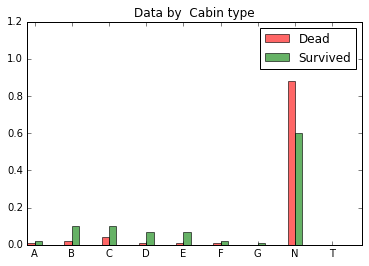

In [25]:
#  Cabin

def first_letter(x):
    if x!="":
        return x[0]
    else:
        return "N"
    
print (data[0:20,10])        
mp_dt = list(map (first_letter,data[:,10]))
print (mp_dt[0:20])


X = np.array(mp_dt)
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

len(X[y_names=='Survived'])

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by  Cabin type")
plt.show()

In [26]:
#  Cabin

X = data[:,10]
X_ticket = data[:,8]
X_name = data[:,3]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'


cabin_data = np.array(list(zip (X,y_names,X_ticket, X_name)))
ind_sort = np.argsort(cabin_data[:,0])
cabin_data = cabin_data[ind_sort,:]

n= 751
print (cabin_data[n:(n+50)])

[['C104' 'Survived' '113786' 'Peuchen, Major. Arthur Godfrey']
 ['C106' 'Survived' '19988' 'Saalfeld, Mr. Adolphe']
 ['C110' 'Dead' '110465' 'Porter, Mr. Walter Chamberlain']
 ['C111' 'Dead' '113051' 'Foreman, Mr. Benjamin Laventall']
 ['C118' 'Dead' 'PC 17596' 'Natsch, Mr. Charles H']
 ['C123' 'Dead' '113803' 'Futrelle, Mr. Jacques Heath']
 ['C123' 'Survived' '113803' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)']
 ['C124' 'Dead' '113028' 'Klaber, Mr. Herman']
 ['C124' 'Dead' '113043' 'Partner, Mr. Austen']
 ['C125' 'Survived' 'PC 17582' 'Shutes, Miss. Elizabeth W']
 ['C125' 'Survived' 'PC 17582'
  'Graham, Mrs. William Thompson (Edith Junkins)']
 ['C126' 'Survived' '19996'
  'Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)']
 ['C126' 'Survived' '19996' 'Taylor, Mr. Elmer Zebley']
 ['C128' 'Dead' '113510' 'Williams-Lambert, Mr. Fletcher Fellows']
 ['C148' 'Survived' '111369' 'Behr, Mr. Karl Howell']
 ['C2' 'Dead' '113776' 'Pears, Mr. Thomas Clinton']
 ['C2' 'Survived' '113776' 'Pea

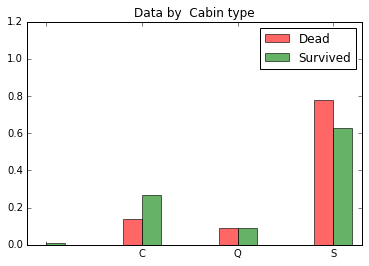

In [27]:
#  Embarked

X = data[:,11]
X_ones = np.ones_like(X)
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

len(X[y_names=='Survived'])

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by  Cabin type")
plt.show()

In [28]:
#  Age vs Name

X_name = np.copy(data[::,3])
X_age = np.copy(data[::,5])

X_age[X_age==""] = -1
X_age = X_age.astype(float)

y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'


cabin_data = np.array(list(zip (X_age, X_name,y_names)))

ind_sort = np.argsort(X_age)
cabin_data = cabin_data[ind_sort,:]

n= 100
print (cabin_data[n:(n+20)])

[['0.0' 'Mockler, Miss. Helen Mary "Ellie"' 'Survived']
 ['0.0' 'Goldenberg, Mrs. Samuel L (Edwiga Grabowska)' 'Survived']
 ['0.0' 'Sage, Mr. Douglas Bullen' 'Dead']
 ['0.0' 'Mamee, Mr. Hanna' 'Survived']
 ['0.0' 'McGovern, Miss. Mary' 'Survived']
 ['0.0' 'Flynn, Mr. James' 'Dead']
 ['0.0' 'Thorneycroft, Mrs. Percival (Florence Kate White)' 'Survived']
 ['0.0' 'Yousif, Mr. Wazli' 'Dead']
 ['0.0' 'Williams-Lambert, Mr. Fletcher Fellows' 'Dead']
 ['0.0' 'Kraeff, Mr. Theodor' 'Dead']
 ['0.0' 'Rogers, Mr. William John' 'Dead']
 ['0.0' "O'Sullivan, Miss. Bridget Mary" 'Dead']
 ['0.0' "O'Driscoll, Miss. Bridget" 'Survived']
 ['0.0' 'Samaan, Mr. Youssef' 'Dead']
 ['0.0' 'Davison, Mrs. Thomas Henry (Mary E Finck)' 'Survived']
 ['0.0' 'Johannesen-Bratthammer, Mr. Bernt' 'Survived']
 ['0.0' 'Hagland, Mr. Ingvald Olai Olsen' 'Dead']
 ['0.0' 'Wiseman, Mr. Phillippe' 'Dead']
 ['0.0' 'Todoroff, Mr. Lalio' 'Dead']
 ['0.0' 'O\'Dwyer, Miss. Ellen "Nellie"' 'Survived']]


Ticket



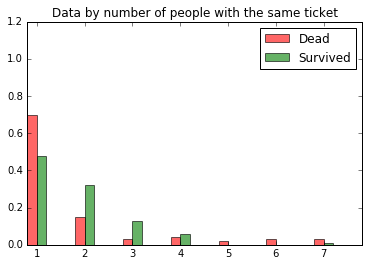

In [29]:
print(header[8])
X = np.copy(data[::,8])
x1 = list(map (lambda x: sum(data[::,8]==x),data[::,8]))
#X = np.column_stack((X,x1))
X = np.array(x1)
print ()
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

len(X[y_names=='Survived'])

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by number of people with the same ticket")
plt.show()

Survived ,  Ticket
668

891
891


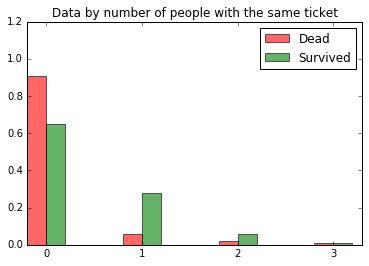

In [30]:
def same_room_surv (x_ticket,x_name, my_data):
    #print (my_data[i_ind,8])
    vect = np.column_stack((my_data[::,8]==x_ticket,my_data[:,1]=='1',my_data[:,3]!=x_name))
    vect = np.all(vect,axis=1)
    return(sum(vect))


print(header[1],", ",header[8])

max_length = int(round(data.shape[0]*0.75,0))
print (max_length)

x1 = list(map (lambda x: same_room_surv(data[x,8],data[x,3],data[:max_length,]),range(data.shape[0])))

#print (x1)
#x1[8]
#print (data[data[:,8]=='347742',:])



X = np.array(x1)
print ()
y_class = data[:,1].astype(np.integer)
y_names = y_class.astype(str)
y_names[y_class==1] = 'Survived'
y_names[y_class==0] = 'Dead'

print (len(X))
#X = X[max_length:]
#y_names = y_names[max_length:]
print (len(X))

plot_data=[]
for my_class in np.unique(y_names):
    
    sum_my = len(X[y_names==my_class])  # sum of my classes
    
    for mx_class in np.unique (X):
        condit = np.logical_and(X==mx_class, y_names==my_class)
        x_weights = round(len(X[condit])/sum_my,2)
        plot_data.append ([my_class,mx_class,x_weights])

plot_data = np.array(plot_data)
plot_data[:,2] = plot_data[:,2].astype(float)
#print (plot_data)

width = 0.2
i_ind = 0
col_arr = ['red','green']
for my_class in np.unique(y_names):
    pl_data = plot_data[plot_data[:,0]==my_class,2].astype(float)
    #print (pl_data)
    ind = np.arange(len(np.unique(X)))
    plt.bar(ind+i_ind*width,pl_data, width, alpha = 0.6, color = col_arr[i_ind], label = my_class)
    i_ind = i_ind + 1

plt.legend(loc='upper right')
plt.ylim ([0,1.2])
ind = np.arange(len(np.unique(X)))
plt.xticks(ind+width,np.unique(X))
plt.title ("Data by number of people with the same ticket")
plt.show()